## Observations and Insights 
### 1.
#### In all the drugs used the most effective ones in reducing Tumor Volume are Capomulin, Ramicane, Infubinol and Ceftamin
### 2. 
#### There is a strong relation to mice using Capomulin in their weight vs tumor volume meaning as the weight goes up volume of the tumor is steadily increasing as correlation is .88 (very close to 1.0)
### 3.
#### For the mouse using Capomulin (Mice ID: s185) through the timepoint (starting from 0 to 45) the tumor volume has drastically reduced to nearly 50%

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [132]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID", "Mouse ID"])
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [82]:
# Checking the number of mice in the DataFrame.
number_of_mice = combined_data["Mouse ID"].unique()
print(f'There are a total of {len(number_of_mice)} mice')

total_mice = combined_data["Mouse ID"].count()
total_mice

There are a total of 249 mice


1893

In [53]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data_drop = combined_data.drop_duplicates(subset="Mouse ID", keep="last")
print(combined_data_drop.shape[0])
combined_data_drop.head()

249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean_tumor = combined_data_drop.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = combined_data_drop.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor = combined_data_drop.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumor = combined_data_drop.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor = combined_data_drop.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({"Mean of Tumor Volume": mean_tumor,
                             "Median of Tumor Volume": median_tumor,
                              "Variance of Tumor Volume": var_tumor,
                              "STD of Tumor Volume": std_tumor,
                              "SEM of Tumor Volume": sem_tumor
                             })

summary_stats

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar Plots

In [59]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
drugs_total = pd.DataFrame(pd.value_counts(combined_data["Drug Regimen"]))
drugs_total

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178
Propriva,161


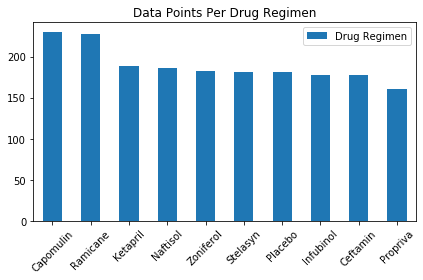

In [71]:
drugs_total.plot(kind="bar")
plt.title("Data Points Per Drug Regimen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


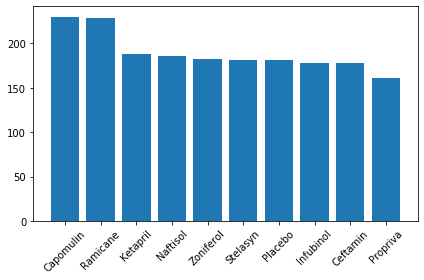

In [133]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = combined_data["Drug Regimen"].value_counts().index
y_axis = combined_data["Drug Regimen"].value_counts()
plt.bar(x_axis,y_axis)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Pie Plots

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_total = pd.value_counts(combined_data_drop["Sex"])
gender_total

Male      125
Female    124
Name: Sex, dtype: int64

Text(0, 0.5, 'Sex')

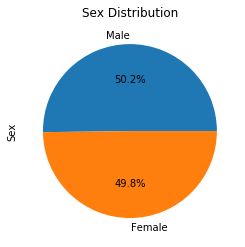

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pandas = gender_total.plot(kind="pie", y="sex", title=("Sex Distribution"), autopct="%1.1f%%")
gender_pandas.set_ylabel("Sex")

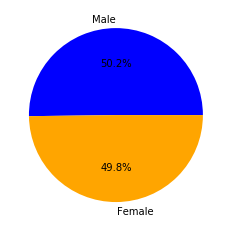

In [79]:
labels = ["Male", "Female"]
sizes = [125,124]
colors = ["blue", "orange"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=0)

## Quartiles, Outliers and Boxplots

In [145]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Capomulin"]
Ramicane = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Ramicane"]
Infubinol = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Infubinol"]
Ceftamin = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Ceftamin"]
x_axisCa = Capomulin["Tumor Volume (mm3)"]
x_axisR = Ramicane["Tumor Volume (mm3)"]
x_axisI = Infubinol["Tumor Volume (mm3)"]
x_axisCe = Ceftamin["Tumor Volume (mm3)"]

# Capomulin
quartilesCa = x_axisCa.quantile([.25,.5,.75])
lowerqCa = quartilesCa[0.25]
upperqCa = quartilesCa[0.75]
iqrCa = upperqCa-lowerqCa
lower_boundCa = lowerqCa - (1.5*iqrCa)
upper_boundCa = upperqCa + (1.5*iqrCa)
print(f"The lower quartile of Capomulin is: {lowerqCa}")
print(f"The upper quartile of Capomulin is: {upperqCa}")
print(f"The interquartile range of Capomulin is: {iqrCa}")
print(f"The the median of Capomulin is: {quartilesCa[0.5]} ")
print(f"Values below {lower_boundCa} could be outliers.")
print(f"Values above {upper_boundCa} could be outliers.")
print("------------------------------------------------------")
# Ramicane
quartilesR = x_axisR.quantile([.25,.5,.75])
lowerqR = quartilesR[0.25]
upperqR = quartilesR[0.75]
iqrR = upperqR-lowerqR
lower_boundR = lowerqR - (1.5*iqrR)
upper_boundR = upperqR + (1.5*iqrR)
print(f"The lower quartile of Ramicane is: {lowerqR}")
print(f"The upper quartile of Ramicane is: {upperqR}")
print(f"The interquartile range of Ramicane is: {iqrR}")
print(f"The the median of Ramicane is: {quartilesR[0.5]} ")
print(f"Values below {lower_boundR} could be outliers.")
print(f"Values above {upper_boundR} could be outliers.")
print("------------------------------------------------------")
# Infubino
quartilesI = x_axisI.quantile([.25,.5,.75])
lowerqI = quartilesI[0.25]
upperqI = quartilesI[0.75]
iqrI = upperqI-lowerqI
lower_boundI = lowerqI - (1.5*iqrI)
upper_boundI = upperqI + (1.5*iqrI)
print(f"The lower quartile of Infubino is: {lowerqI}")
print(f"The upper quartile of Infubino is: {upperqI}")
print(f"The interquartile range of Infubino is: {iqrI}")
print(f"The the median of Infubino is: {quartilesI[0.5]} ")
print(f"Values below {lower_boundI} could be outliers.")
print(f"Values above {upper_boundI} could be outliers.")
print("------------------------------------------------------")
# Ceftamin
quartilesCe = x_axisCe.quantile([.25,.5,.75])
lowerqCe = quartilesCe[0.25]
upperqCe = quartilesCe[0.75]
iqrCe = upperqCe-lowerqCe
lower_boundCe = lowerqCe - (1.5*iqrCe)
upper_boundCe = upperqCe + (1.5*iqrCe)
print(f"The lower quartile of Ceftamin is: {lowerqCe}")
print(f"The upper quartile of Ceftamin is: {upperqCe}")
print(f"The interquartile range of Ceftamin is: {iqrCe}")
print(f"The the median of Ceftamin is: {quartilesCe[0.5]} ")
print(f"Values below {lower_boundCe} could be outliers.")
print(f"Values above {upper_boundCe} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------------------------------------------
The lower quartile of Infubino is: 54.04860769
The upper quartile of Infubino is: 65.52574285
The interquartile range of Infubino is: 11.477135160000003
The the median of Infubino is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
--

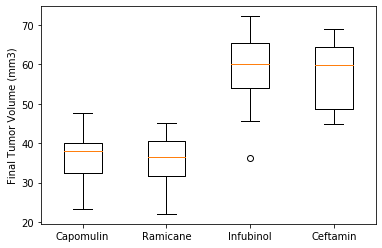

In [130]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Capomulin"]
Ramicane = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Ramicane"]
Infubinol = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Infubinol"]
Ceftamin = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Ceftamin"]
x_axisCa = Capomulin["Tumor Volume (mm3)"]
x_axisR = Ramicane["Tumor Volume (mm3)"]
x_axisI = Infubinol["Tumor Volume (mm3)"]
x_axisCe = Ceftamin["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
ax1.boxplot([x_axisCa, x_axisR, x_axisI, x_axisCe])
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

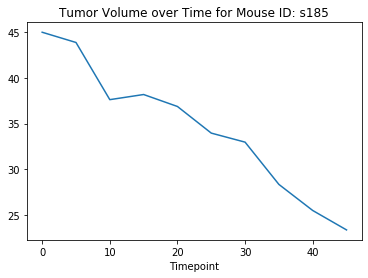

In [157]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = combined_data.loc[combined_data["Mouse ID"] == "s185"]
x_axis = x_axis["Timepoint"]
y_axis = combined_data.loc[combined_data["Mouse ID"] == "s185"]
y_axis = y_axis["Tumor Volume (mm3)"]
# x_axis = combined_data.loc[np.arange(10,20), "Timepoint"]
# y_axis = combined_data.loc[np.arange(10,20), "Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Tumor Volume over Time for Mouse ID: s185")
plt.xlabel("Timepoint")


Text(0.5, 0, 'Mouse Weight')

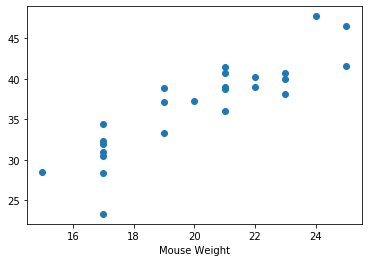

In [180]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight_capomulin = combined_data_drop.loc[combined_data_drop["Drug Regimen"]== "Capomulin"]
mouse_weight = mouse_weight_capomulin["Weight (g)"]
tumor_volume = mouse_weight_capomulin["Tumor Volume (mm3)"]
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Mouse Weight")



## Correlation and Regression

The correlation between mouse weight and mouse tumor volume is 0.88


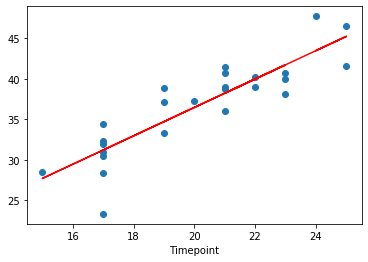

In [182]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Caposmulin regimen
correlation = st.pearsonr(mouse_weight,tumor_volume)
print(f'The correlation between mouse weight and mouse tumor volume is {round(correlation[0],2)}')
slope , int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
fit = slope*mouse_weight + int
plt.scatter(mouse_weight,tumor_volume)
plt.plot(mouse_weight, fit, "-", color ="r")
plt.xlabel("Timepoint")
plt.show()